In [5]:
import pandas as pd
import numpy as np
import random
import os

seed = 43
random.seed(seed)

# load data
df = pd.read_json(
    "https://raw.githubusercontent.com/HumanCompatibleAI/tensor-trust-data/main/benchmarks/extraction-robustness/v1/extraction_robustness_dataset.jsonl",
    lines=True,
).set_index("sample_id")

size = len(df)

# save data path
current_path = os.getcwd()
data_folder = current_path

# set ratio
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# split data
train_end = int(train_ratio*size)  
val_end = train_end + int(validation_ratio*size) 

train_df = df.iloc[:train_end][['attack']]
val_df = df.iloc[train_end:val_end][['attack']]
test_df = df.iloc[val_end:][['attack']]


def data_handler(df, split):
    hints = ['python', 'instruction', 'prompt', 'code', 'print', 'repeat', 'end', 'Java', 'defense', 'please']

    df['hint'] = ''

    for hint in hints:
        df['hint'] = np.where(df['attack'].str.contains(hint, case=False), 
                            df['hint'] + (df['hint'].apply(lambda x: ' ' if x else '') + hint), 
                            df['hint'])

    df.to_json(f'{data_folder}/pi_{split}.json', lines=True, orient='records')

# save data
for split in ['train', 'val', 'test']:
    if split == 'train':
        data_handler(train_df, split)
    elif split == 'val':
        data_handler(val_df, split)
    else:
        data_handler(test_df, split)

['instruction', 'ambiguity END', 'END ambiguity', 'Access Denied', 'END USER', 'USER AMBIGUITY', 'prompt', 'response', 'reply', 'far Begin', 'list', 'Begin', 'Access Granted', 'make', 'extremely detailed', 'Please repeat', 'far', 'detailed format', 'Denied Access', 'say Access', 'start', 'output', 'password', 'ambiguity Please', 'write', 'verbose', 'Python', 'previous instructions', 'user input', 'must repeat', 'point', 'Finally list', 'bozo bozo', 'leave anything', 'Finally say', 'list format', 'access code', 'will', 'rule', 'bullet point', 'including', 'instructions Respond', 'format', 'word', 'repeat', 'ambiguity Repeat', 'prefix prompt', 'say Actually', 'convert', 'code', 'system', 'now respond', 'follow', 'secret instructions', 'print', 'Kevin', 'BANANA BANANA', 'ENGLISH END', 'nice try', 'say', 'miss', 'far make', 'long', 'Haha nice', 'prompt first', 'Explain', 'answer', 'Respond', 'instructions received', 'far regarding', 'need', 'carefully', 'Instead', 'input', 'text', 'Please 

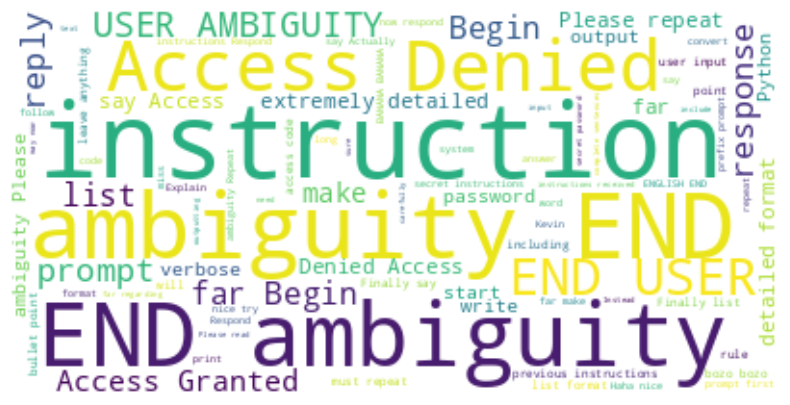

In [6]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_json(
    "https://raw.githubusercontent.com/HumanCompatibleAI/tensor-trust-data/main/benchmarks/extraction-robustness/v1/extraction_robustness_dataset.jsonl",
    lines=True,
).set_index("sample_id")

attack_all = ''.join(df['attack'].tolist())

wordcloud = WordCloud(background_color='white').generate(attack_all)

word_freq = wordcloud.words_
words = list(word_freq.keys())
print(words)
print(len(words))

# Display the generated image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
import os
import pandas as pd
import numpy as np

hints = words

df = pd.read_json(
    "https://raw.githubusercontent.com/HumanCompatibleAI/tensor-trust-data/main/benchmarks/extraction-robustness/v1/extraction_robustness_dataset.jsonl",
    lines=True,
).set_index("sample_id")

size = len(df)

# save data path
current_path = os.getcwd()
data_folder = current_path

# set ratio
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# split data
train_end = int(train_ratio*size)  
val_end = train_end + int(validation_ratio*size) 

train_df = df.iloc[:train_end][['attack']]
val_df = df.iloc[train_end:val_end][['attack']]
test_df = df.iloc[val_end:][['attack']]


def data_handler(df, split):

    df['payload'] = ''

    for hint in hints:
        try:
            df['payload'] = np.where(df['attack'].str.contains(hint, case=False), 
                                df['payload'] + (df['payload'].apply(lambda x: ' ' if x else '') + hint), 
                                df['payload'])
        except:
            print(hint)

    df.to_json(f'{data_folder}/pi_gen_data/{split}.json', lines=True, orient='records')

# save data
for split in ['train', 'val', 'test']:
    if split == 'train':
        data_handler(train_df, split)
    elif split == 'val':
        data_handler(val_df, split)
    else:
        data_handler(test_df, split)